In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torchvision.models import resnet50, ResNet50_Weights
from torch.utils.data import DataLoader, Sampler
from AdaIN import AdaIN

In [2]:
style_path = "style/sketch.png"
prebuildEncoder = "vgg.pth"
prebuildDecoder = "decoder-adain.pth"
image_path = "content/avril.jpg"

print(resnet50(weights=ResNet50_Weights.DEFAULT))

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(256),
    transforms.ToTensor()
])

#coco content
train_content_dataset = datasets.ImageFolder(
    root= "../coco",             
    transform=transform
)

#wikiart
train_style_dataset = datasets.ImageFolder(
    root= "../archive",             
    transform=transform
)

train_content_loader = DataLoader(train_content_dataset, batch_size=1, shuffle=True)
train_style_loader = DataLoader(train_style_dataset, batch_size=1, shuffle=True)


In [4]:
resnet = resnet50(weights=ResNet50_Weights.DEFAULT)
encoder = nn.Sequential(*list(resnet.children())[:6])

In [5]:
#Training completed

# newAdaINModel = AdaIN()
# newAdaINModel.uploadEncoder(encoder)
# newAdaINModel.train(train_content_loader, train_style_loader, "resnet-model-layer2.pth", steps = 50000)
# newAdaINModel.fit(image_path,[style_path])
# newAdaINModel.pipeline()
# newAdaINModel.displayImages()
# newAdaINModel.evaluate()

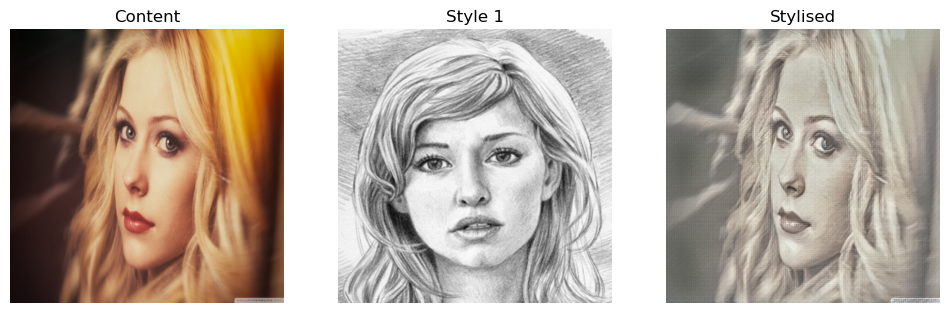

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.558, '239.268 ms')

In [6]:
#Verify result
layer2ResAdaIN = AdaIN(prebuild_decoder="Model/resnet-model-layer2.pth")
layer2ResAdaIN.uploadEncoder(encoder)
layer2ResAdaIN.loadPrebuildDecoder()
layer2ResAdaIN.setup()
layer2ResAdaIN.fit(image_path,[style_path])
layer2ResAdaIN.pipeline()
layer2ResAdaIN.displayImages()
layer2ResAdaIN.evaluate()

In [7]:
# resL2Model = AdaIN()
# resL2Model.uploadEncoder(encoder)
# resL2Model.epochTraining(train_content_loader, train_style_loader, "resnet-model-layer2-increasedstyle.pth", steps = 30000, style_weight=10.0)
# resL2Model.fit(image_path,[style_path])
# resL2Model.pipeline()
# resL2Model.displayImages()
# resL2Model.evaluate()

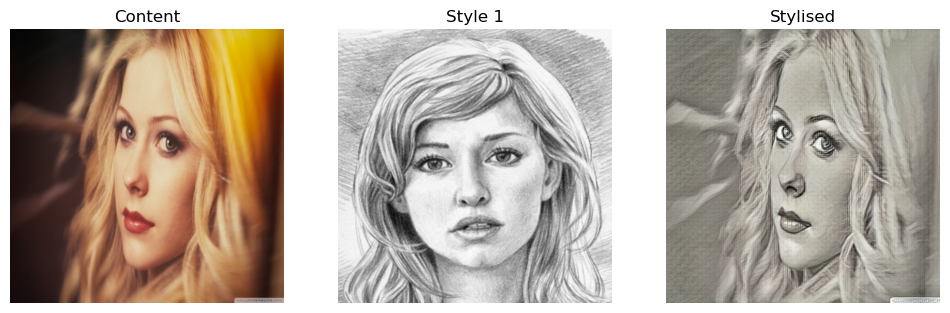

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.644, '83.501 ms')

In [8]:
#Verify result
strongStyleL2 = AdaIN(prebuild_decoder="Model/resnet-model-layer2-increasedstyle.pth_5.pth")
strongStyleL2.uploadEncoder(encoder)
strongStyleL2.loadPrebuildDecoder()
strongStyleL2.setup()
strongStyleL2.fit(image_path,[style_path])
strongStyleL2.pipeline()
strongStyleL2.displayImages()
strongStyleL2.evaluate()

In [9]:

resnetL3 = resnet50(weights=ResNet50_Weights.DEFAULT)
l3Encoder = nn.Sequential(*list(resnetL3.children())[:7])


decoder_new = nn.Sequential(    
            nn.ReflectionPad2d(1),
            nn.Conv2d(1024, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),

            
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 128, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(128, 128, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(128, 64, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 64, 3),
            nn.ReLU(inplace=True),

            
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 3, 3),
        )
resL3Model = AdaIN(prebuild_decoder = "Model/resnet-model-layer3_5.pth")
resL3Model.uploadEncoder(l3Encoder)
resL3Model.uploadDecoder(decoder_new)
#training completed
# resL3Model.epochTraining(train_content_loader, train_style_loader, "resnet-model-layer3", steps = 20000)
resL3Model.setup()

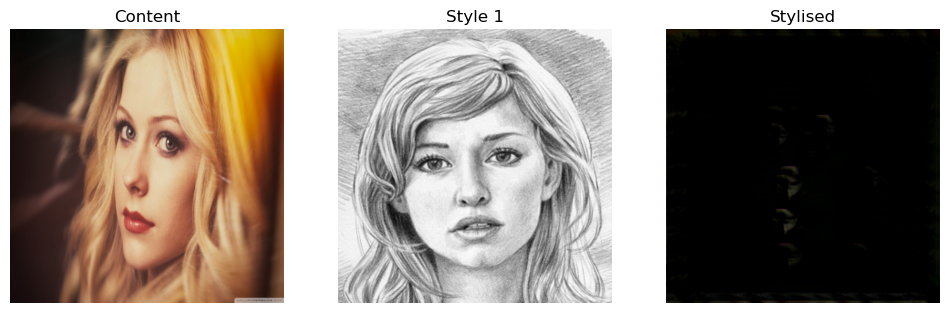

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.876, '191.695 ms')

In [10]:
resL3Model.fit(image_path,[style_path])
resL3Model.pipeline()
resL3Model.displayImages()
resL3Model.evaluate()